# Notebook for the Download of MOD15A2H.061: Terra Leaf Area Index/FPAR 8-Day Global 500m


In [6]:
%%capture
!pip install geemap
!pip install rasterio
!pip install geedim

In [7]:
import os.path
out_dir = os.path.expanduser('~/Downloads')
import zipfile
import os # we import hte necessary packages

# Import necessary modules
import geemap
import ee
import numpy as np
import rasterio # here we want to plot the data we received
import matplotlib.pyplot as plt


In [8]:
from geopy import distance
import copy


In [9]:
ee.Authenticate() # we authenticate
# and intialize geemap
ee.Initialize(project='ee-encodersmap1')

In [10]:
from google.colab import drive # we mount the drive for later downloading of the files
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:

# Define the region of interest (roiComputed)
roiComputed = ee.Geometry.Polygon(
    [[[-12.15, 31.8],
      [36.15, 31.8],
      [36.15, 72.15],
      [-12.15, 72.15]]])



In [12]:
grid = geemap.create_grid(roiComputed, 3e5)

# Loop through the tiles of the grid
grid_dict = ((grid.getInfo())['features'][0])
copied_dict_list = copy.deepcopy(((grid.getInfo())['features']))



# Loop through the coordinates and modify them
grid_features_list = copy.deepcopy((grid.getInfo())['features'])

names_of_images = []

for  i in range(len((grid.getInfo())['features'])):

  coordinates = (grid_features_list[i])['geometry']['coordinates'][0]

  north_latitude = max(coord[1] for coord in coordinates)
  south_latitude = min(coord[1] for coord in coordinates)
  west_longitude = min(coord[0] for coord in coordinates)
  east_longitude = max(coord[0] for coord in coordinates)

  name_ofImage = 'N'+str(north_latitude).replace('.', '_')+'S'+str(south_latitude).replace('.', '_')+'W'+str(west_longitude).replace('.', '_')+'E'+str(east_longitude).replace('.', '_')
  names_of_images.append(name_ofImage)

  north_latitude += 0.3
  south_latitude -= 0.3
  west_longitude -= 0.5
  east_longitude += 0.5


  modified_coordinates = [[west_longitude,south_latitude],[east_longitude,south_latitude],[east_longitude,north_latitude],[west_longitude,north_latitude],[west_longitude,south_latitude]]
  updated_dict = {'coordinates': [modified_coordinates]}
  # Update the modified coordinates in the dictionary

  copied_dict_list[i]['geometry'].update(updated_dict)


copied_dict = ((grid.getInfo())['features'][0]).copy()
copied_dict

{'type': 'Feature',
 'geometry': {'geodesic': False,
  'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
  'type': 'Polygon',
  'coordinates': [[[-13.474729261792822, 29.64440437594421],
    [-10.779783409434257, 29.64440437594421],
    [-10.779783409434257, 32.33935022830277],
    [-13.474729261792822, 32.33935022830277],
    [-13.474729261792822, 29.64440437594421]]]},
 'id': '-5,11',
 'properties': {}}

In [13]:
# Create a FeatureCollection from the list of features
feature_collection = ee.FeatureCollection(copied_dict_list)


In [14]:

# Load the MODIS/061/MOD15A2H collection
modis_collection = ee.ImageCollection("MODIS/061/MOD15A2H")

# Filter the collection by the region of interest and year
filtered_collection = modis_collection.filterBounds(roiComputed) \
                                      .filterDate('2015-05-01', '2015-11-01')

# Print the filtered collection
print(filtered_collection)

# Select the desired bands ("Ec", "Es", "Ei") from the filtered collection
desired_band_names = ["Lai_500m"]
filtered_collection = filtered_collection.select(desired_band_names)

# Print the modified collection
print(filtered_collection)


# Function to calculate yearly average
def calculate_yearly_average(image):
    year = ee.Date(image.get('system:time_start')).get('year')
    return image.set('year', year)

# Map the function over the collection
yearly_averages = filtered_collection.map(calculate_yearly_average)

# Reduce the collection to yearly averages within the specified region of interest
yearly_averages_roi = yearly_averages.mean().clip(roiComputed)

# Display the yearly averages within the region of interest on the map
Map = geemap.Map()
Map.centerObject(roiComputed, 6)
Map.addLayer(yearly_averages_roi, {}, 'Yearly Average (2015)')

# Display the grid on the map
Map.addLayer(feature_collection, {}, 'Grid')

# Display the map
Map



ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "MODIS/061/MOD15A2H"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.intersects",
                "arguments": {
                  "leftField": {
                    "constantValue": ".all"
                  },
                  "rightValue": {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geo

Map(center=[50.998399862311786, 11.999999999999998], controls=(WidgetControl(options=['position', 'transparent…

In [15]:

                # Get the ID of the image

nominal_scale = yearly_averages.mean().projection().nominalScale().getInfo()



# Split the ID to extract the name


nominal_scale

111319.49079327357

In [16]:
# Get the CRS of the yearly_averages_roi
crs = yearly_averages_roi.projection().getInfo()['crs']

# Print the CRS
print("CRS:", crs)


CRS: EPSG:4326


In [17]:
output_path = "LAI2015"


In [18]:
geemap.download_ee_image_tiles(yearly_averages_roi,feature_collection, output_path,scale=500 ,crs=crs)

001.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None


002.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

003.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

004.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

005.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

006.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

007.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

008.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

009.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

010.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

011.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

012.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

013.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

014.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

015.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

016.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

017.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

018.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

019.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

020.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

021.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

022.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

023.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

024.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

025.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

026.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

027.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

028.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

029.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

030.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

031.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

032.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

033.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

034.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

035.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

036.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

037.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

038.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

039.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

040.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

041.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

042.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

043.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

044.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

045.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

046.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

047.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

048.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

049.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

050.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

051.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

052.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

053.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

054.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

055.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

056.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

057.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

058.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

059.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

060.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

061.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

062.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

063.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

064.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

065.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

066.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

067.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

068.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

069.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

070.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

071.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

072.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

073.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

074.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

075.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

076.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

077.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

078.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

079.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

080.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

081.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

082.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

083.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

084.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

085.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

086.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

087.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

088.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

089.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

090.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

091.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

092.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

093.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

094.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

095.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

096.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

097.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

098.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

099.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

100.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

101.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

102.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

103.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

104.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

105.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

106.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

107.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

108.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

109.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

110.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

111.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

112.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

113.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

114.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

115.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

116.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

117.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

118.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

119.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

120.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

121.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

122.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

123.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

124.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

125.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

126.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

127.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

128.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

129.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

130.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

131.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

132.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

133.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

134.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

135.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

136.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

137.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

138.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

139.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

140.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

141.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

142.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

143.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

144.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

145.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

146.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

147.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

148.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

149.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

150.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

151.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

152.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

153.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

154.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

155.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

156.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

157.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

158.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

159.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

160.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

161.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

162.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

163.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

164.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

165.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

166.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

167.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

168.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

169.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

170.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

171.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

172.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

173.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

174.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

175.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

176.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

177.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

178.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

179.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

180.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

181.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

182.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

183.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

184.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

185.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

186.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

187.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

188.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

189.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

190.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

191.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

192.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

193.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

194.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

195.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

196.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

197.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

198.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

199.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

200.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

201.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

202.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

203.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

204.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

205.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

206.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

207.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

208.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

209.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

210.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

211.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

212.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

213.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

214.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

215.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

216.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

217.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

218.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

219.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

220.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

221.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

222.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

223.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

224.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

225.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

226.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

227.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

228.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

229.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

230.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

231.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

232.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

233.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

234.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

235.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

236.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

237.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

238.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

239.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

240.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

241.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

242.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

243.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

244.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

245.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

246.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

247.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

248.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

249.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

250.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

251.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

252.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

253.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

254.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

255.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

256.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

257.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

258.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

259.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

260.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

261.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

262.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

263.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

264.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

265.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

266.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

267.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

268.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

269.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

270.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

271.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

272.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

273.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

274.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

275.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

276.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

277.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

278.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

279.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

280.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

281.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

282.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

283.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

284.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

285.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

286.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

287.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

288.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

289.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

290.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

291.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

292.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

293.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

294.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

295.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

296.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

297.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

298.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

299.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

300.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

301.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

302.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

303.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

304.tif: |          | 0.00/4.84M (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 304 tiles in 1342.1183269023895 seconds.


Band 1: Lai_500m
BoundingBox(left=23.75145611212015, bottom=72.46260239350121, right=27.452515082692578, top=75.75941948621985)


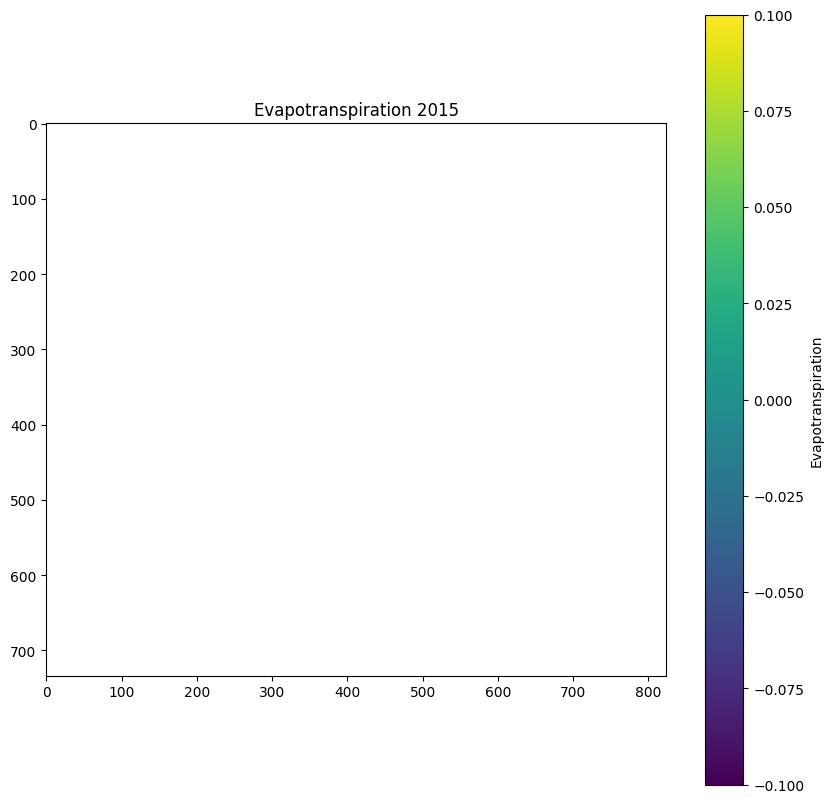

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]


In [19]:
import rasterio
import matplotlib.pyplot as plt

# Read the raster file
file_path = '/content/LAI2015/302.tif'
dataset = rasterio.open(file_path)
# Get the band names
band_names = dataset.descriptions

# Print the band names
for band_index, band_name in enumerate(band_names, start=1):
    print(f"Band {band_index}: {band_name}")
# Read the raster data
raster_data = dataset.read(1)
print(dataset.bounds)

# Visualize the raster data
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='viridis')
plt.colorbar(label='Evapotranspiration')
plt.title('Evapotranspiration 2015')
plt.show()
print(raster_data)

In [20]:
# Specify the directory where the .tif files are located

directory_path = "/content/LAI2015v2"

In [21]:
import os
import rasterio
import numpy as np

def set_nan_to_value(input_folder, output_folder, value):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".tif"):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            with rasterio.open(input_path) as src:
                raster_data = src.read()

                # Set NaN values to the desired value for all bands
                for band in range(src.count):
                    raster_data[band][np.isnan(raster_data[band])] = value

                # Update the metadata to reflect the modified raster
                profile = src.profile

                # Write the modified raster to the output folder
                with rasterio.open(output_path, 'w', **profile) as dst:
                    dst.write(raster_data)


# Specify the input folder containing the TIFF files
input_folder_path = "/content/LAI2015"

# Specify the output folder where the modified TIFF files will be saved
output_folder_path = "/content/LAI2015v2"

# Specify the value to replace NaN values
nan_replacement_value = -5

# Call the function to process the TIFF files
set_nan_to_value(input_folder_path, output_folder_path, nan_replacement_value)


In [22]:
def delete_same_value_tif(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".tif"):
            tif_path = os.path.join(directory, filename)
            with rasterio.open(tif_path) as dataset:
                raster_data = dataset.read(1)

                # Check if all data points have the same value
                if (raster_data == raster_data[0]).all():
                    os.remove(tif_path)
                    print(f"Deleted {filename}")

# Specify the directory where the .tif files are located

delete_same_value_tif('/content/LAI2015')

Deleted 297.tif
Deleted 024.tif
Deleted 277.tif
Deleted 290.tif
Deleted 271.tif
Deleted 200.tif
Deleted 043.tif
Deleted 020.tif
Deleted 015.tif
Deleted 235.tif
Deleted 005.tif
Deleted 298.tif
Deleted 256.tif
Deleted 081.tif
Deleted 291.tif
Deleted 302.tif
Deleted 293.tif
Deleted 295.tif
Deleted 119.tif
Deleted 299.tif
Deleted 303.tif
Deleted 233.tif
Deleted 276.tif
Deleted 236.tif
Deleted 001.tif
Deleted 294.tif
Deleted 016.tif
Deleted 280.tif
Deleted 296.tif
Deleted 176.tif
Deleted 255.tif
Deleted 163.tif
Deleted 237.tif
Deleted 257.tif
Deleted 217.tif
Deleted 259.tif
Deleted 240.tif
Deleted 301.tif
Deleted 254.tif
Deleted 062.tif
Deleted 195.tif
Deleted 281.tif
Deleted 278.tif
Deleted 238.tif
Deleted 101.tif
Deleted 304.tif
Deleted 300.tif
Deleted 234.tif
Deleted 219.tif
Deleted 260.tif
Deleted 017.tif
Deleted 252.tif
Deleted 239.tif
Deleted 289.tif
Deleted 292.tif
Deleted 100.tif
Deleted 218.tif
Deleted 275.tif
Deleted 181.tif
Deleted 274.tif
Deleted 258.tif
Deleted 279.tif
Deleted 

In [23]:

def rename_tif_files(directory):
    count = 0
    for file_name in os.listdir(directory):
        if file_name.endswith('.tif'):
            file_path = os.path.join(directory, file_name)
            combined_string = get_combined_string(file_path) # getting new name
            new_file_name = 'ID'+str(count)+combined_string + '.tif' # renaming the file
            new_file_path = os.path.join(directory, new_file_name)
            os.rename(file_path, new_file_path)
            count += 1 # counting the ID of the gile

def get_combined_string(tif_file):
    with rasterio.open(tif_file) as src:

        bounds = src.bounds
        bounds_right = bounds.right
        bounds_left = bounds.left
        bounds_top = bounds.top
        bounds_bottom = bounds.bottom

              # Ensure bounds.top > bounds.bottom
        if bounds_top <  bounds_bottom:
            bounds_top,  bounds_bottom =  bounds_bottom, bounds_top

        # Ensure bounds.right > bounds.left
        if  bounds_right <  bounds_left:
             bounds_right,  bounds_left =  bounds_left, bounds_right

        bounds_top -= 0.3
        bounds_bottom += 0.3
        bounds_right -= 0.5
        bounds_left += 0.5


        right_string = str(float( bounds_right)).replace('.', '_')
        left_string = str(float(bounds_left)).replace('.', '_')
        top_string = str(float(bounds_top)).replace('.', '_')
        bottom_string = str(float( bounds_bottom)).replace('.', '_')
        combined_string = f"N{top_string}S{bottom_string}W{left_string}E{right_string}"
        return combined_string

# Example usage
rename_tif_files(directory_path)


In [24]:

import re

def extract_number_from_filename(filename):
    pattern = r"^ID(\d+)N"
    match = re.match(pattern, filename)
    if match:
        number = int(match.group(1))
        return number
    else:
        return None

def get_average_bounds(tif_path):
    with rasterio.open(tif_path) as dataset:
        bounds = dataset.bounds
        average_top_bottom = (bounds.top + bounds.bottom) / 2.0
        average_left_right = (bounds.left + bounds.right) / 2.0

    return average_top_bottom, average_left_right

# Specify the directory where the .tif files are located

tif_files = [filename for filename in os.listdir(directory_path) if filename.endswith(".tif")]

bounds_array = np.empty((len(tif_files), 3), dtype=np.float32)

for i, tif_file in enumerate(tif_files):
    tif_path = os.path.join(directory_path, tif_file)
    average_top_bottom, average_left_right = get_average_bounds(tif_path)
    bounds_array[i, 0] = extract_number_from_filename(tif_file)
    bounds_array[i, 1] = average_top_bottom
    bounds_array[i, 2] = average_left_right

print("Bounds Array:")
print(bounds_array)

# Create the output directory if it doesn't exist
output_directory = "/content/LAI"
os.makedirs(output_directory, exist_ok=True)

# Save the bounds_array to an .npy file
output_file = os.path.join(output_directory, "bounds_array.npy")
np.save(output_file, bounds_array)

print("Bounds array saved as:", output_file)

Bounds Array:
[[300.         57.941338   22.90704  ]
 [116.         41.77166     1.3474729]
 [290.         71.41606    33.686825 ]
 [ 91.         74.11101    28.296932 ]
 [230.         39.076714   22.90704  ]
 [ 28.         44.466606   20.212093 ]
 [265.         71.41606    -1.3474729]
 [ 67.         30.991877   33.686825 ]
 [271.         36.381767   -9.43231  ]
 [ 24.         71.41606   -12.127256 ]
 [289.         30.991877   36.381767 ]
 [ 73.         66.02618    20.212093 ]
 [126.         57.941338  -12.127256 ]
 [241.         52.551445   12.127256 ]
 [ 15.         66.02618    12.127256 ]
 [ 46.         52.551445    1.3474729]
 [224.         44.466606   -6.737365 ]
 [295.         41.77166     4.042419 ]
 [299.         41.77166    20.212093 ]
 [121.         71.41606    12.127256 ]
 [284.         30.991877   -9.43231  ]
 [ 37.         39.076714   20.212093 ]
 [  2.         60.63628    25.601986 ]
 [215.         57.941338   17.517149 ]
 [251.         44.466606   36.381767 ]
 [ 50.     

In [25]:
import shutil

# Specify the source and destination paths
source_folder = "/content/LAI2015v2"
destination_folder = "/content/LAI/LAI2015v2"

# Move the folder to the new location
shutil.move(source_folder, destination_folder)


'/content/LAI/LAI2015v2'

In [26]:
def zip_and_download_folder(folder_path, output_filename):
    shutil.make_archive(output_filename, 'zip', folder_path)
    shutil.move(f"{output_filename}.zip", "/content/" + f"{output_filename}.zip")

# Specify the folder to be zipped and downloaded
folder_path = "/content/LAI"
output_filename = "LAI"

zip_and_download_folder(folder_path, output_filename)


In [27]:
from google.colab import files

def download_zip_file(zip_file_path):
    files.download(zip_file_path)

# Specify the path to the zip file
zip_file_path = "/content/LAI.zip"

download_zip_file(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Step 2: Copy and rename the file
!cp /content/LAI.zip "/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/LAI_2015_Redux.zip"